<a href="https://colab.research.google.com/github/imakshit/Major-Project/blob/master/Heart_attack_prediction_analysis/Heart_Attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('/content/cleveland.csv')

#DATASET

The dataset consists of 303 individuals data. There are 14 columns in the dataset, which are described below.
1. Age: displays the age of the individual.
2. Sex: displays the gender of the individual using the following format :
1 = male
0 = female
3. Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
1 = typical angina
2 = atypical angina
3 = non — anginal pain
4 = asymptotic
4. Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
5. Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
6. Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
If fasting blood sugar > 120mg/dl then : 1 (true)
else : 0 (false)
7. Resting ECG : displays resting electrocardiographic results
0 = normal
1 = having ST-T wave abnormality
2 = left ventricular hyperthrophy
8. Max heart rate achieved : displays the max heart rate achieved by an individual.
9. Exercise induced angina :
1 = yes
0 = no
ST depression induced by exercise relative to rest: displays the value which is an integer or float.
10. Peak exercise ST segment :
1 = upsloping
2 = flat
3 = downsloping
Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
11. Thal : displays the thalassemia :
3 = normal
6 = fixed defect
7 = reversible defect
12. Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
0 = absence
1, 2, 3, 4 = present.

In [29]:
df.head()

,63,1,1.1,145,233,1.2,2,150,0,2.3,3,0.1,6,0.2
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [0]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [31]:
# 1 = male, 0 = female
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [0]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

In [0]:
import seaborn as sns

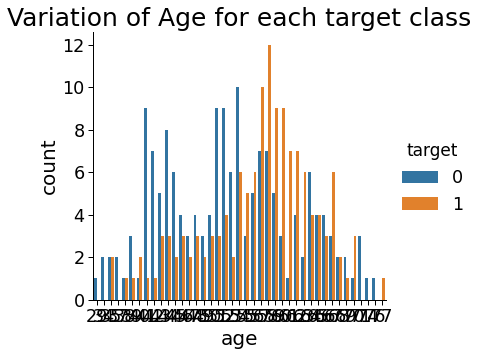

In [35]:
# distribution of target vs age 
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

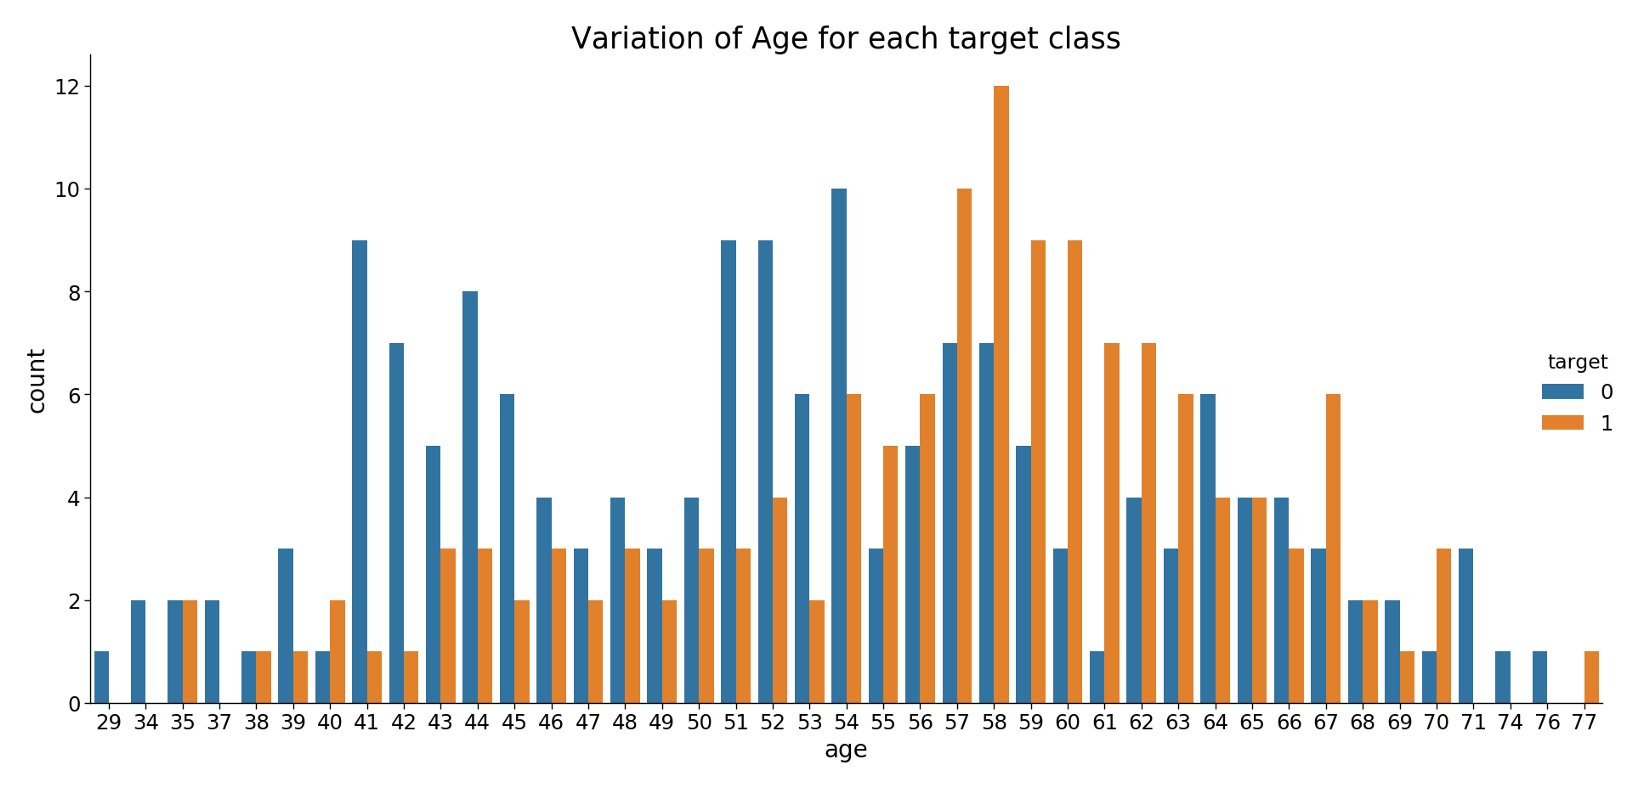

#CONCLUSION

We see that most people who are suffering are of the age of 58, followed by 57.
Majorly, people belonging to the age group 50+ are suffering from the disease.

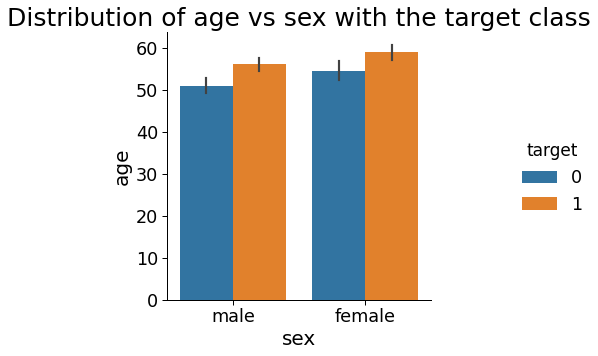

In [36]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

#CONCLUSION

We see that for females who are suffering from the disease are older than males.

In [0]:
df['sex'] = df.sex.map({'female': 0, 'male': 1})

#DATA PRE-PROCESSING

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#MODELS

**SVM**

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [45]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0])

In [0]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

In [47]:
cm_test

array([[27,  4],
       [ 6, 24]])

In [0]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [49]:
cm_train

array([[126,  16],
       [  4,  95]])

In [50]:
print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for svm = 0.91701244813278
Accuracy for test set for svm = 0.8360655737704918


**NAIVE BAYES**

In [51]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Naive Bayes = 0.8547717842323651
Accuracy for test set for Naive Bayes = 0.8524590163934426


**LOGISTIC REGRESSION**

In [53]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8547717842323651
Accuracy for test set for Logistic Regression = 0.8852459016393442


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**DECISION TREE**

In [54]:

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7213114754098361


**RANDOM FOREST**

In [55]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Random Forest = 0.991701244813278
Accuracy for test set for Random Forest = 0.8032786885245902


**LIGHT GBM**

In [56]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = y_train)
params = {}

clf = lgb.train(params, d_train, 100)
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
       
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = clf.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for LightGBM = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for LightGBM = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for LightGBM = 0.983402489626556
Accuracy for test set for LightGBM = 0.8688524590163934


**XGBOOST**


In [57]:

from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = xg.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for XGBoost = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for XGBoost = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for XGBoost = 0.970954356846473
Accuracy for test set for XGBoost = 0.8524590163934426


#conclusion

Heart Disease is one of the major concerns for society today.
It is difficult to manually determine the odds of getting heart disease based on risk factors. However, machine learning techniques are useful to predict the output from existing data.


From the above analysis, we observe that - 
Logistic Regression is the best model as all other models give a high accuracy on training dataset but on test dataset the accuracy is less, also known as overfitting

